In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
T = np.pi * 16 
dt = np.pi * 0.01
AMPLITUDE = 0.9
NUM_TIME_STEPS=int(T//dt + 1)

RATIO_TRAIN=0.6

In [3]:
amplitude = 1.0
data = np.sin( np.linspace(0, T, NUM_TIME_STEPS) ) * AMPLITUDE
np.savetxt('training.txt', data[:int(len(data) * RATIO_TRAIN)])

# double precision and compute weight once

In [4]:
%%time
!./reservoir_f64
predicted = np.loadtxt('predicted.txt')

INIT
res->in_weights: -0.100000 0.100000 0.100000 0.100000
res->res_weights: -0.061653 -0.014637 0.050161 0.013653
res->out_weights: 0.000000 0.000000 0.000000 0.000000
res->res_nodes: 0.000000 0.000000 0.000000 0.000000
TRAINED
res->in_weights: -0.100000 0.100000 0.100000 0.100000
res->res_weights: -0.061653 -0.014637 0.050161 0.013653
res->out_weights: 0.153710 0.482511 0.178690 0.028085
res->res_nodes: 0.045367 -0.043731 -0.036949 -0.034226
CPU times: user 11.2 ms, sys: 15.4 ms, total: 26.6 ms
Wall time: 482 ms


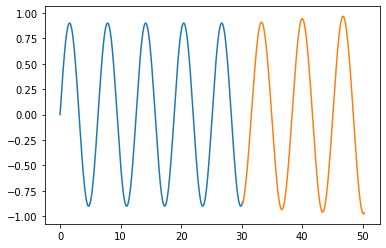

In [5]:
t = np.linspace(0, T, NUM_TIME_STEPS)
plt.plot(t[:int(len(data) * RATIO_TRAIN)], data[:int(len(data) * RATIO_TRAIN)], label="inputs")
plt.plot(t[int(len(data) * RATIO_TRAIN):], predicted, label="predicted")
plt.show()

# single precision and compute weight once

In [6]:
%%time
!./reservoir_f32
predicted = np.loadtxt('predicted.txt')

INIT
res->in_weights: -0.100000 0.100000 0.100000 0.100000
res->res_weights: -0.061653 -0.014637 0.050161 0.013653
res->out_weights: 0.000000 0.000000 0.000000 0.000000
res->res_nodes: 0.000000 0.000000 0.000000 0.000000
TRAINED
res->in_weights: -0.100000 0.100000 0.100000 0.100000
res->res_weights: -0.061653 -0.014637 0.050161 0.013653
res->out_weights: 0.153806 0.482404 0.178746 0.027993
res->res_nodes: 0.045367 -0.043731 -0.036949 -0.034226
CPU times: user 13.8 ms, sys: 5.53 ms, total: 19.3 ms
Wall time: 380 ms


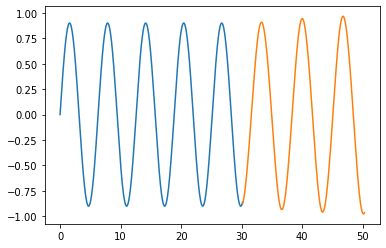

In [7]:
t = np.linspace(0, T, NUM_TIME_STEPS)
plt.plot(t[:int(len(data) * RATIO_TRAIN)], data[:int(len(data) * RATIO_TRAIN)], label="inputs")
plt.plot(t[int(len(data) * RATIO_TRAIN):], predicted, label="predicted")
plt.show()

# single precision and compute weight on every 10 sample

In [8]:
%%time
!./reservoir_batch_f32
predicted = np.loadtxt('predicted.txt')

INIT
res->in_weights: -0.100000 0.100000 0.100000 0.100000
res->res_weights: -0.061653 -0.014637 0.050161 0.013653
res->out_weights: 0.000000 0.000000 0.000000 0.000000
res->res_nodes: 0.000000 0.000000 0.000000 0.000000
TRAINED
res->in_weights: -0.100000 0.100000 0.100000 0.100000
res->res_weights: -0.061653 -0.014637 0.050161 0.013653
res->out_weights: 0.153788 0.482504 0.178739 0.028144
res->res_nodes: 0.045367 -0.043731 -0.036949 -0.034226
CPU times: user 22.6 ms, sys: 8.2 ms, total: 30.8 ms
Wall time: 1.95 s


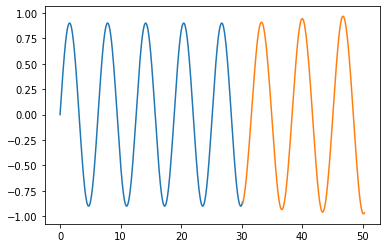

In [9]:
t = np.linspace(0, T, NUM_TIME_STEPS)
plt.plot(t[:int(len(data) * RATIO_TRAIN)], data[:int(len(data) * RATIO_TRAIN)], label="inputs")
plt.plot(t[int(len(data) * RATIO_TRAIN):], predicted, label="predicted")
plt.show()